In [1]:
# This script is for computing the derivative of the original pressure function and find the indices of spikes in the output. 
# The motivation is that the indices where the spikes are quite large are interesting points to apply explainable AI teqhniques on.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.HDFStore("../../cloudcontainer/concatenated_experiments.hdf5", mode='r').select("alldata_mean_instead_of_NaN")

df_train_minmax = pd.HDFStore("../../cloudcontainer/concatenated_experiments.hdf5", mode='r').select("alldata_mean_instead_of_NaN/train/minmax")
df_val_minmax = pd.HDFStore("../../cloudcontainer/concatenated_experiments.hdf5", mode='r').select("alldata_mean_instead_of_NaN/val/minmax")
df_test_minmax = pd.HDFStore("../../cloudcontainer/concatenated_experiments.hdf5", mode='r').select("alldata_mean_instead_of_NaN/test/minmax")

pressure = df["pressure"]
pressure_train_minmax = df_train_minmax["pressure"]
pressure_val_minmax = df_val_minmax["pressure"]
pressure_test_minmax = df_test_minmax["pressure"]

In [4]:
pressure_derivative = pressure.diff()

In [5]:
train_len = len(df_train_minmax)
val_len = len(df_val_minmax)
test_len = len(df_test_minmax)

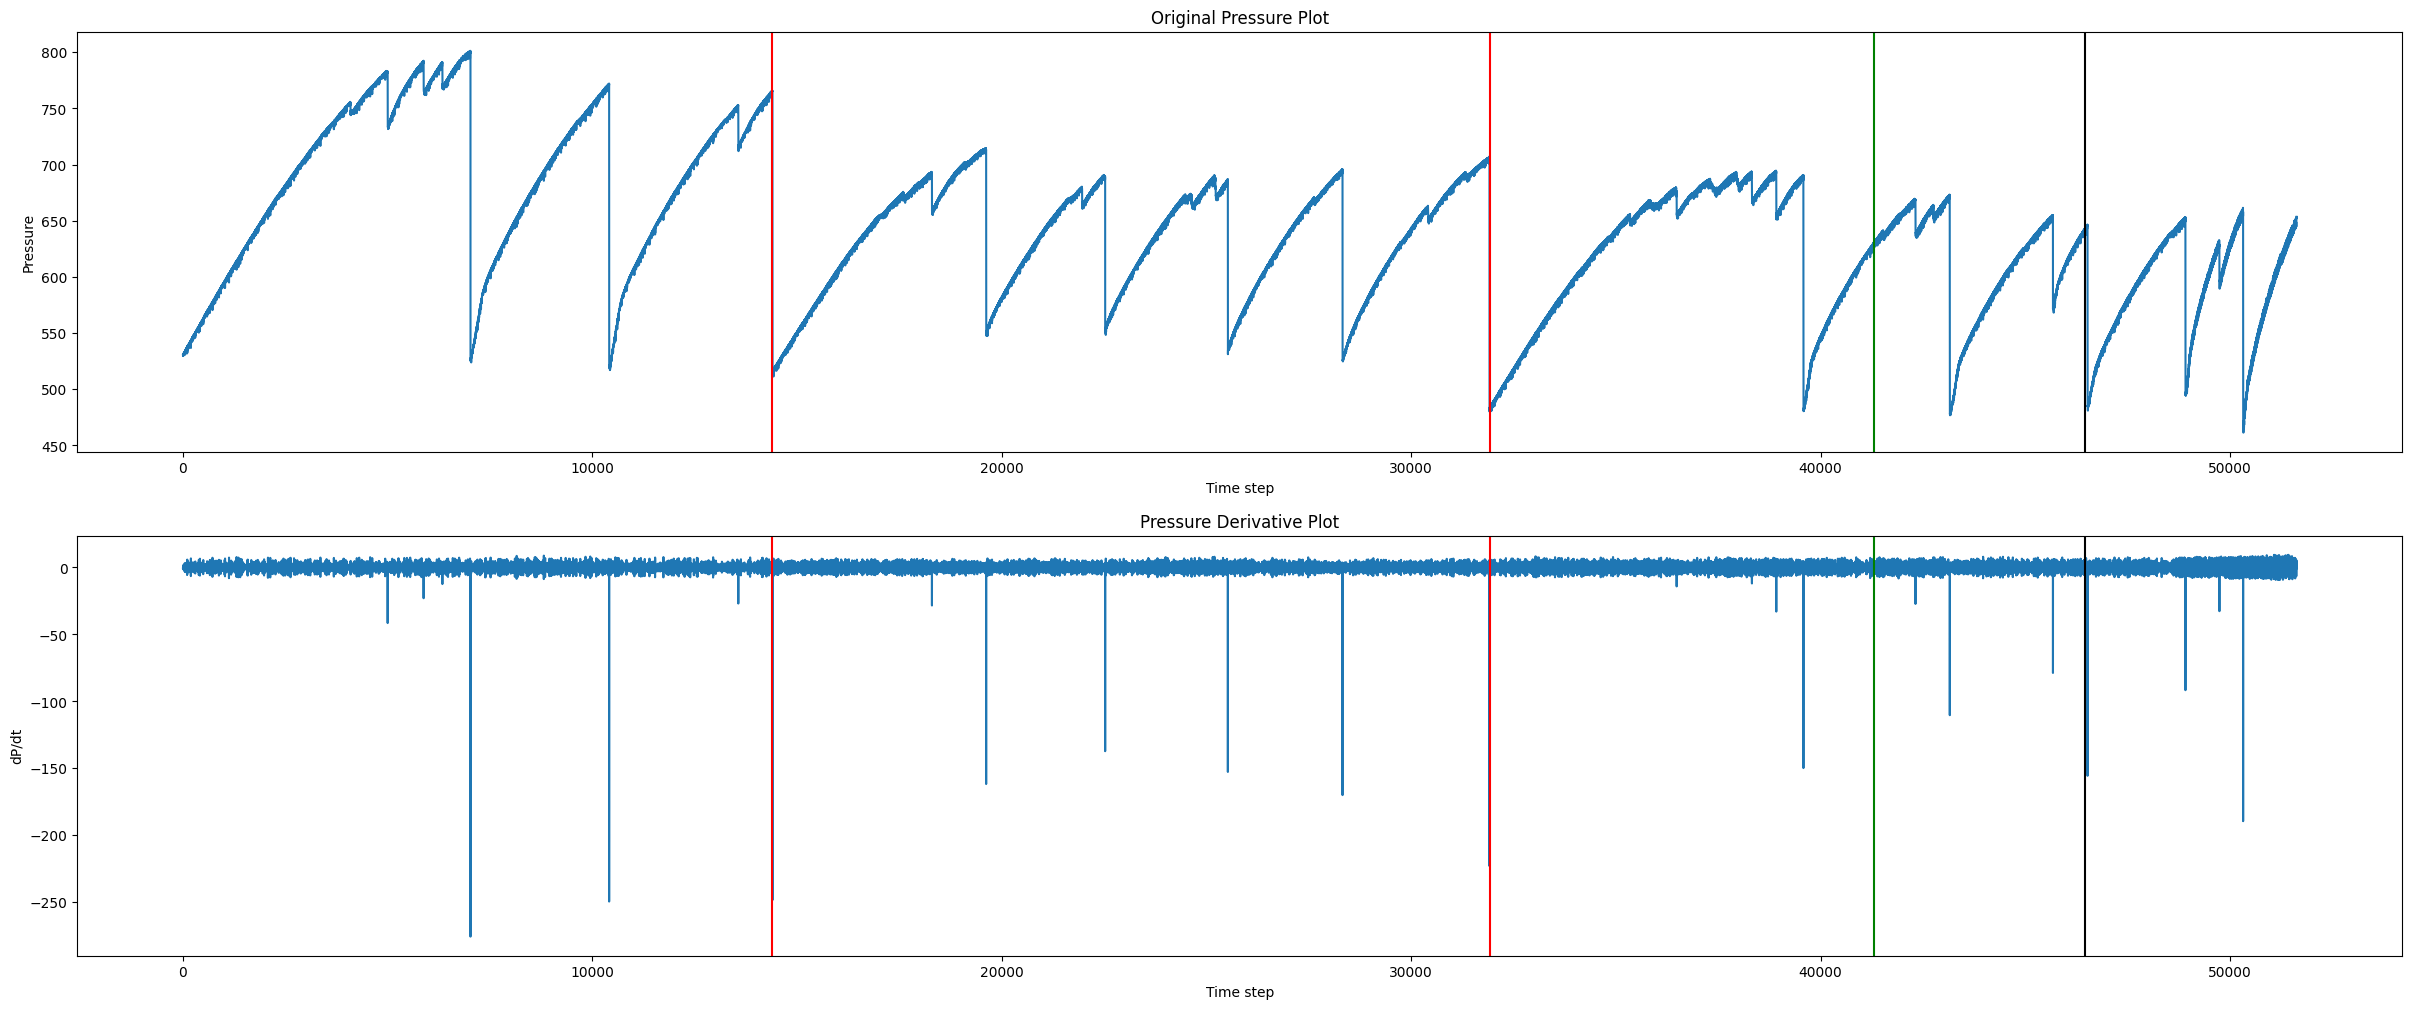

In [6]:
fig = plt.figure(figsize=(30,12))
ax1 = fig.add_subplot(211)
plt.plot(pressure)
plt.title("Original Pressure Plot")
plt.ylabel('Pressure')
plt.xlabel('Time step')
plt.axvline(x=14400, color='r')
plt.axvline(x=14400+17515, color='r')
plt.axvline(x=train_len, color='g')
plt.axvline(x=train_len+val_len, color='black')

ax2 = fig.add_subplot(212)
plt.plot(pressure_derivative)
plt.title("Pressure Derivative Plot")
plt.ylabel("dP/dt")
plt.xlabel("Time step")
plt.axvline(x=14400, color='r')
plt.axvline(x=14400+17515, color='r')
plt.axvline(x=train_len, color='g')
plt.axvline(x=train_len+val_len, color='black')

In [7]:
pressure_drop_indices = pressure_derivative.index[pressure_derivative < -28].tolist() # The threshold of -28 was chosen empirically based on the derivative plot depicted above.
# Remove the 2 concatenation sites where the 3 experiments were merged:
pressure_drop_indices.remove(14400)
pressure_drop_indices.remove(31915)

print(len(pressure_drop_indices))
print(pressure_drop_indices)

19
[5001, 7024, 10411, 18296, 19620, 22527, 25524, 28325, 38920, 39582, 39583, 43157, 43158, 45678, 46523, 48914, 48915, 49744, 50323]


### Do the same as above, but only for the test dataset this time, so that the test indices without offset from train and val data are computed

In [8]:
pressure_test_derivative = pressure_test_minmax.diff()

Text(0.5, 0, 'Time step')

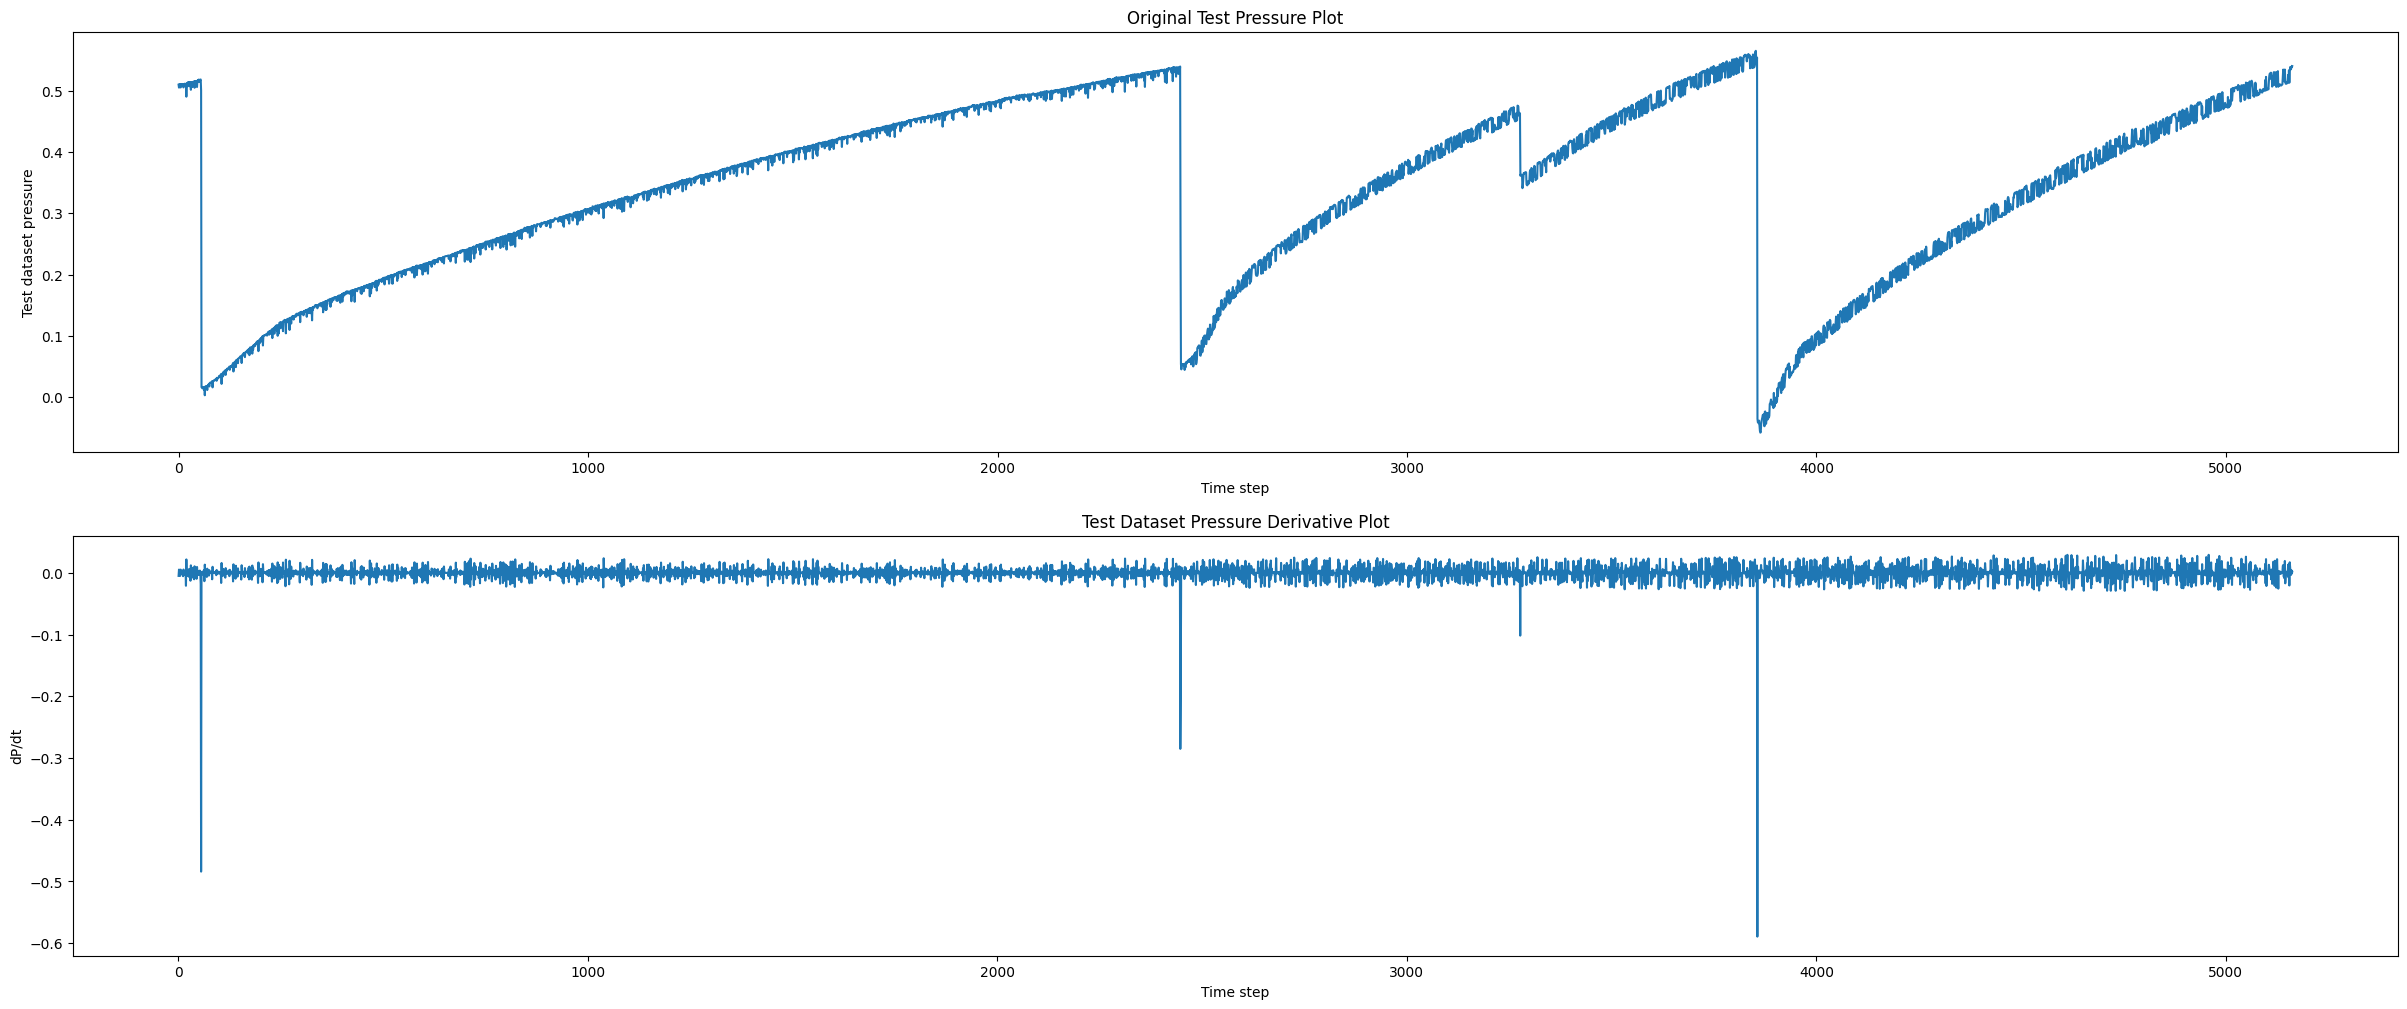

In [9]:
fig = plt.figure(figsize=(30,12))
ax1 = fig.add_subplot(211)
plt.plot(pressure_test_minmax.to_numpy())
plt.title("Original Test Pressure Plot")
plt.ylabel('Test dataset pressure')
plt.xlabel('Time step')

ax2 = fig.add_subplot(212)
plt.plot(pressure_test_derivative.to_numpy())
plt.title("Test Dataset Pressure Derivative Plot")
plt.ylabel("dP/dt")
plt.xlabel("Time step")

In [10]:
test_pressure_drop_indices = pressure_test_derivative.index[pressure_test_derivative < -0.1].tolist()
print(np.array(test_pressure_drop_indices)-train_len-val_len)

[  56 2447 2448 3277 3856]
